### **Training and Testing Datasets**

1. Introduction
2. Import Libraries
3. Load and Explore the Dataset
4. Visualize the Data
5. Prepare Features and Labels
6. Split Data for Training and Testing
7. Train the Model
8. Make Predictions
9. Evaluate Model Performance
10. Summary

### 1. Introduction

* In this notebook, we will demonstrate how to split a dataset into training and testing sets, train a regression model, and evaluate its performance. 

* We'll use a house prices (`house_prices_tt.csv`) dataset with features like area (sqft) and number of bedrooms to predict the house price (in INR).

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

### 3. Load and Explore the Dataset

Let's load the house prices dataset from `house_prices_tt.csv` and view the first few rows.

In [2]:
df = pd.read_csv('house_prices_tt.csv')
df.head()

,Area(sqft),Bedrooms,Price(INR)
0,1097,2,5000000
1,1226,2,4934000
2,1314,2,5708000
3,1148,2,4312000
4,1316,2,5349000


Let's check basic statistics and info.

In [3]:
# Basic statistics of the dataset
df.describe()

,Area(sqft),Bedrooms,Price(INR)
count,74.000000,74.000000,7.400000e+01
mean,2649.540541,3.391892,1.962142e+07
std,1203.727193,0.807797,1.170607e+07
min,830.000000,2.000000,3.132000e+06
25%,1413.250000,3.000000,7.942250e+06
50%,2802.000000,4.000000,2.444500e+07
75%,3596.250000,4.000000,2.879000e+07
max,4887.000000,4.000000,3.955000e+07


In [4]:
# Let's check the data types and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Area(sqft)  74 non-null     int64
 1   Bedrooms    74 non-null     int64
 2   Price(INR)  74 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


### 4. Visualize the Data

Let's visualize the relationship between area, bedrooms, and price.

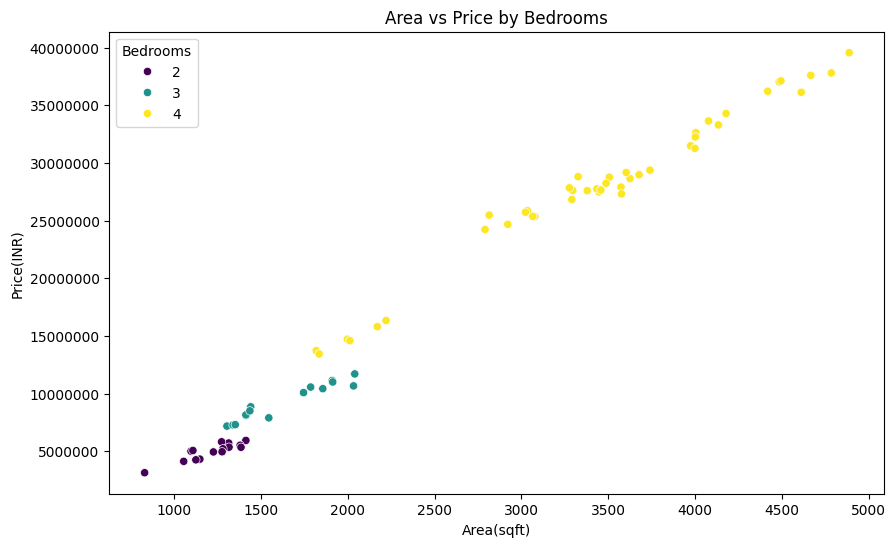

In [5]:
# visualizing the distribution of house prices vs area
plt.figure(figsize=(10, 6))
# Disable scientific notation for y-axis
plt.ticklabel_format(style='plain', axis='y')  
sns.scatterplot(data=df, x='Area(sqft)', y='Price(INR)', hue='Bedrooms', palette='viridis')
plt.title('Area vs Price by Bedrooms')
plt.show()

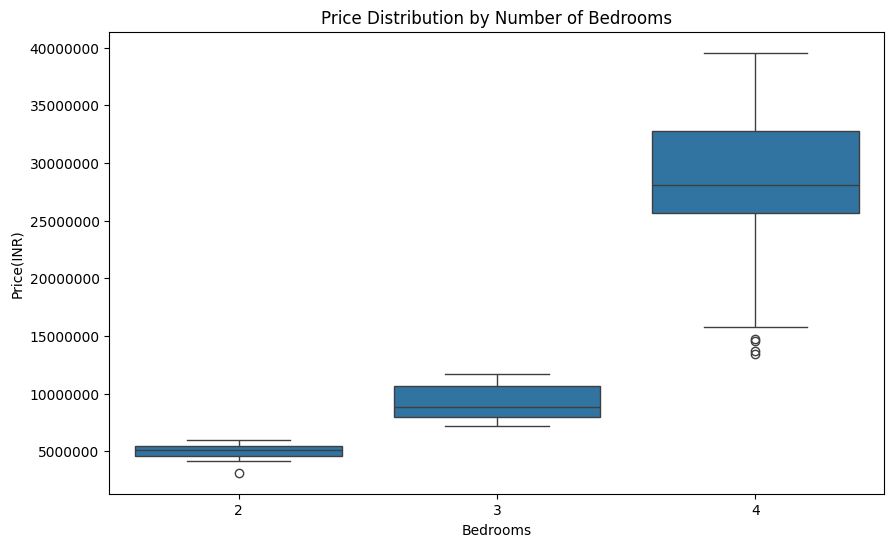

In [6]:
# visualizing the distribution of house prices by number of bedrooms
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y') 
sns.boxplot(data=df, x='Bedrooms', y='Price(INR)')
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

### 5. Prepare Features and Labels

We select `Area(sqft)` and `Bedrooms` as features and `Price(INR)` as the label.

In [7]:
X = df[['Area(sqft)', 'Bedrooms']]
y = df['Price(INR)']

### **6. Split Data for Training and Testing**

We split the data into training and testing sets to evaluate model performance on unseen data.

In [8]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# Displaying the number of samples in training and testing sets
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 59, Testing samples: 15


### 7. Train the Model

We train a linear regression model using the training data.

In [16]:
# Training a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 8. Make Predictions

We use the trained model to predict house prices for the test set.

In [17]:
# Making predictions on the test set
y_pred = model.predict(X_test)


In [18]:
# Printing predicted and actual prices
print('Predicted prices:', y_pred)
print('Actual prices:', y_test.values)

Predicted prices: [ 5275413.7543356  22017103.94921388  7229264.11192564  3399149.60476691
 11358758.72421839 28982413.32637987  5823728.39165248 26343649.13429238
  4932717.10601255 27637328.98171189 32392244.9771942  27063312.09577078
  6106453.126519   37618368.86412071  3493391.18305575]
Actual prices: [ 5349000 24220000  7176000  5000000 10560000 29170000  5516000 27610000
  4950000 27490000 32250000 27590000  5931000 36120000  5060000]


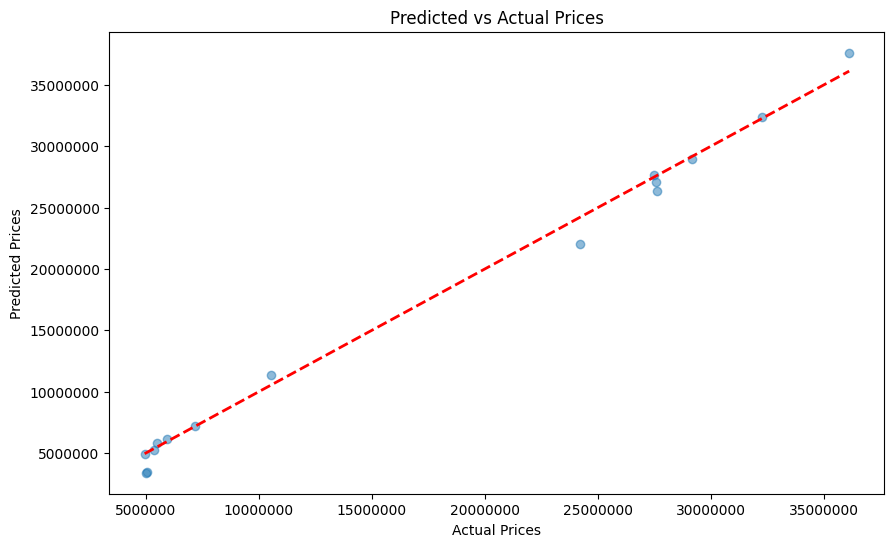

In [19]:
# Visualizing the predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='both')
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

### 9. Evaluate Model Performance

We evaluate the model using R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [20]:
# Evaluating the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [21]:
# Printing evaluation metrics
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.993
MAE: 704333.13
MSE: 989671005638.26
RMSE: 994822.10


### 10. Summary

* In this notebook, we learned how to split a dataset into training and testing sets.
* We train a regression model, and evaluate its performance using a house price prediction example. 

* This workflow is essential for building robust machine learning models that generalize well to new data.

---

### **Exercise: Car Fuel Efficiency Prediction**

#### Problem Statement

* In this exercise, you are provided with a dataset `car_mpg_tt.csv` that contains information about various car models, including features such as horsepower, weight, and number of cylinders. 

* Your objective is to build a regression model to predict fuel efficiency measured in MPG (miles per gallon) using these features.

* You will explore and visualize the data, prepare it for modeling, and then train a regression model. 

* The dataset will be split into training and testing sets to evaluate how well the model performs on unseen data. 

* Finally, you'll assess the model using appropriate evaluation metrics and interpret the results.

---

* Download dataset : [car_mpg_tt.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/04_Training_and_Testing_Dataset_ML/Exercise_Training_and_Testing_Dataset/car_mpg_tt.csv) 
* Solution : [Exercise - Training and Testing Dataset](https://github.com/prakash-ukhalkar/ML/blob/main/04_Training_and_Testing_Dataset_ML/Exercise_Training_and_Testing_Dataset/04_Exercise_Training_Testing_Dataset.ipynb)